In [1]:
import matplotlib.pyplot as plt
import torch
from PIL import Image
from torchvision.transforms import Compose, ToTensor, Resize
from fundus_quality_prediction import load_quality_ensemble, ensemble_predict_quality, plot_quality

### Inference for a single image using the ensemble model

In [2]:
# Get a sample image
url = "https://upload.wikimedia.org/wikipedia/commons/3/37/Fundus_photograph_of_normal_right_eye.jpg"
!wget -O fundus.jpg $url

--2024-06-04 10:24:41--  https://upload.wikimedia.org/wikipedia/commons/3/37/Fundus_photograph_of_normal_right_eye.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253968 (248K) [image/jpeg]
Saving to: ‘fundus.jpg’

100%[======================================>] 253.968     --.-K/s   in 0,09s   

2024-06-04 10:24:41 (2,83 MB/s) - ‘fundus.jpg’ saved [253968/253968]



Set the following as desired:

In [3]:
device = "cuda:0"

# Threshold for the quality prediction: values below this threshold are considered as bad quality
threshold = 0.25

Use the example image path or provide your own absolute path to the image you want to use:

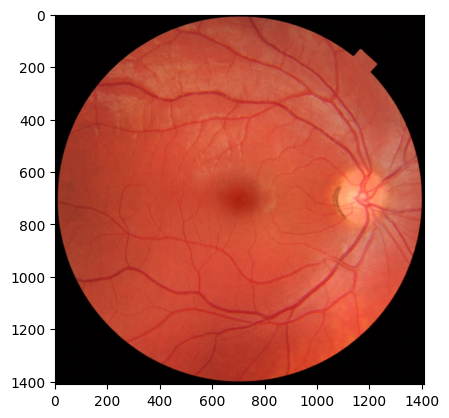

In [4]:
image = "fundus.jpg"
plt.imshow(plt.imread(image))

Run the below code to predict the image quality. <br><br>```ensemble_predict_from_image``` returns a tuple of the "model confidence" (a value between 0 and 1 arising from a sigmoid on the output logit) and the predicted class. The latter is the result of applying your threshold to the confidence score. Class 0 refers to low quality / non-gradable images, while class 1 refers to high quality / gradable images.

In [5]:
ensemble = load_quality_ensemble(device=device)

Model loaded from 2024-05-03 14-38-34
Model loaded from 2024-05-03 14-25-19
Model loaded from 2024-05-03 14-25-42
Model loaded from 2024-05-03 14-58-37
Model loaded from 2024-05-03 16-23-29
Model loaded from 2024-05-03 15-28-00
Model loaded from 2024-05-03 15-04-29
Model loaded from 2024-05-06 20-25-14
Model loaded from 2024-05-03 15-52-56
Model loaded from 2024-05-03 15-59-31


In [6]:
conf, label = ensemble_predict_quality(ensemble, image, threshold=threshold)

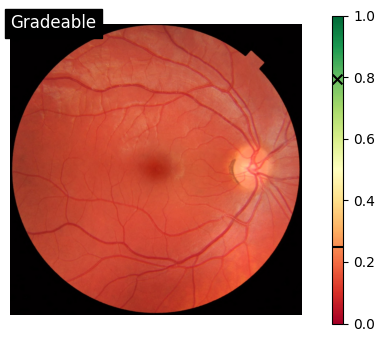

In [7]:
plot_quality(image, conf, label, threshold=threshold)

### Inference for a batch of images

In [8]:
image_paths = [
    "../../fovea_detection/DeepDRiD/regular_fundus_images/regular-fundus-training/Images/197/197_l1.jpg",
    "../../fovea_detection/DeepDRiD/regular_fundus_images/regular-fundus-training/Images/197/197_l2.jpg",
    "../../fovea_detection/DeepDRiD/regular_fundus_images/regular-fundus-training/Images/197/197_r1.jpg",
        "../../fovea_detection/DeepDRiD/regular_fundus_images/regular-fundus-training/Images/4/4_l2.jpg",
    "../../fovea_detection/DrimDB/Good/drimdb_good (4).jpg",
    "../../fovea_detection/DrimDB/Bad/drimdb_bad (1).jpg",
    "../../fovea_detection/DrimDB/Outlier/drimdb_outlier (3).jpg",
    "../../fovea_detection/DrimDB/Outlier/drimdb_outlier (16).jpg",
]

In [9]:
# Feed in same sized images of at least 350x350 px
transform = Compose([Resize((350, 350)), ToTensor()])

image_batch = torch.stack([transform(Image.open(image_path)) for image_path in image_paths])

print(f"Batch of images: {image_batch.shape}")

Batch of images: torch.Size([8, 3, 350, 350])


In [10]:
ensemble = load_quality_ensemble(device=device)

Model loaded from 2024-05-03 14-38-34
Model loaded from 2024-05-03 14-25-19
Model loaded from 2024-05-03 14-25-42
Model loaded from 2024-05-03 14-58-37
Model loaded from 2024-05-03 16-23-29
Model loaded from 2024-05-03 15-28-00
Model loaded from 2024-05-03 15-04-29
Model loaded from 2024-05-06 20-25-14
Model loaded from 2024-05-03 15-52-56
Model loaded from 2024-05-03 15-59-31


In [11]:
conf, label = ensemble_predict_quality(ensemble, image_batch, threshold=threshold)

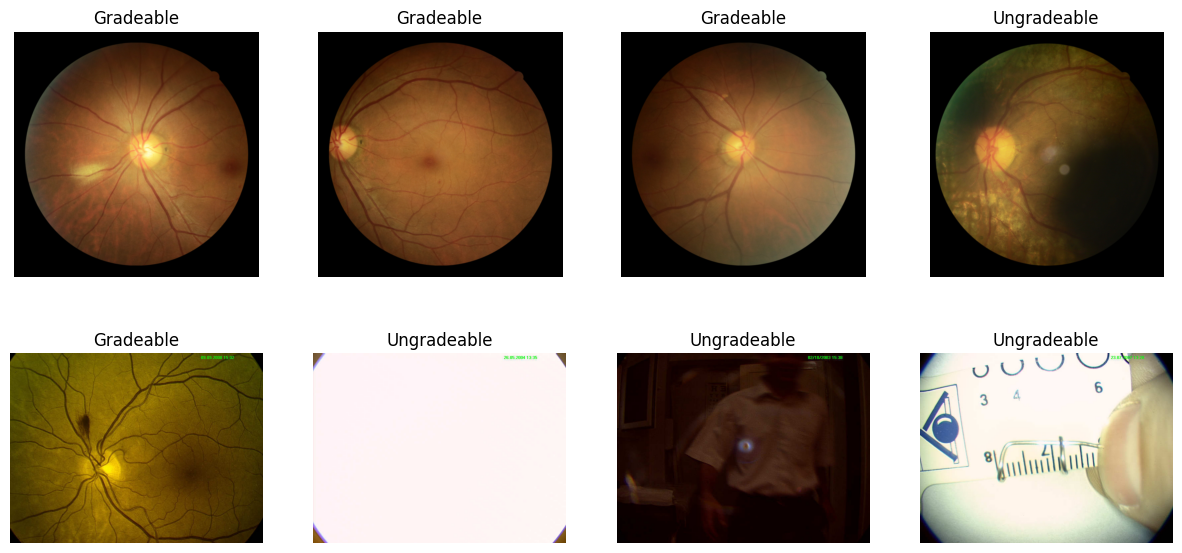

In [12]:
# Plot grid of images
fig, axs = plt.subplots(2, 4, figsize=(15, 7))
for i, (image_path, ax) in enumerate(zip(image_paths, axs.flatten())):
    image = Image.open(image_path)
    ax.imshow(image)
    ax.axis("off")
    ax.set_title('Gradeable' if label[i] == 1 else 'Ungradeable')